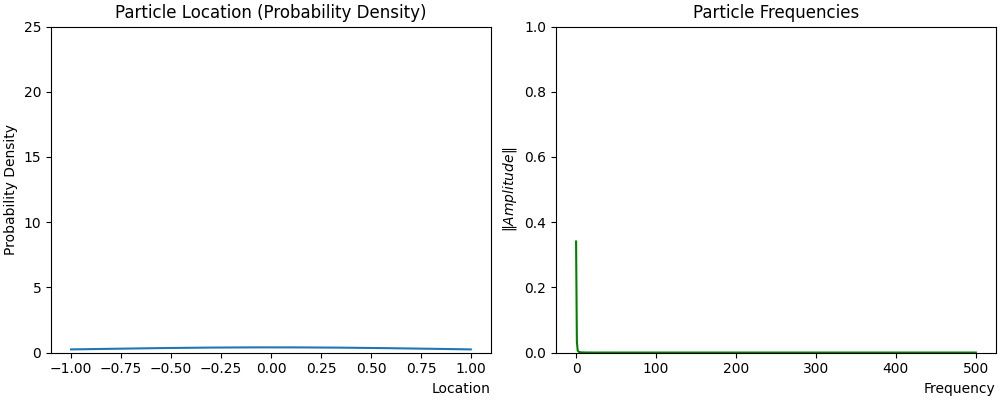

In [1]:
"""# uncertainty_principle.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

if typing.TYPE_CHECKING:
    from typing import Generator

    from matplotlib.axes import Axes
    from matplotlib.lines import Line2D
    from numpy.typing import NDArray

%matplotlib widget

wave_pdf: Line2D
wave_ps: Line2D

sigma: float
ts: NDArray[np.float_]


def f(x: NDArray[np.float_]) -> NDArray[np.float_]:
    # The Gaussian standard normal probability density function
    return (
        1
        / (sigma * np.sqrt(2 * np.pi))
        * np.exp((-1 / 2) * np.power(x, 2) / (np.power(sigma, 2)))
    )


def plot_samples(ts: NDArray[np.float_], ys: NDArray[np.float_], ax: Axes) -> None:
    global wave_pdf
    (wave_pdf,) = ax.plot(ts, ys)
    ax.set_title(f"Particle Location (Probability Density)")
    ax.set_xlabel("Location", loc="right")
    ax.set_ylabel("Probability Density")
    ax.set_ylim(0, 25)


def plot_powerspec(ps: NDArray[np.float_], ax: Axes) -> None:
    global wave_ps
    (wave_ps,) = ax.plot(range(len(ps)), ps, color="green")
    ax.set_title(f"Particle Frequencies")
    ax.set_xlabel("Frequency", loc="right")
    ax.set_ylabel(r"$\Vert Amplitude \Vert$")
    ax.set_ylim(0, 1)


def anim_frame_counter() -> Generator[int, None, None]:
    global sigma
    n = 1
    while n < 1200:
        if n <= 600:
            sigma = 10 / n
        else:
            sigma = 10 / (1200 - n)
        n += 5
        yield n


def anim_draw_frame(t: float) -> tuple[Line2D, Line2D]:
    global sigma
    ys: NDArray[np.float_] = f(ts)
    wave_pdf.set_data(ts, ys)

    sigma /= 30
    ys = f(ts)
    ca: NDArray[np.complex_] = np.fft.rfft(ys) / 2
    ps: NDArray[np.float_] = np.abs(ca) / len(ca)

    wave_ps.set_data(range(len(ps)), ps)

    return (
        wave_pdf,
        wave_ps,
    )


def main() -> None:
    global ts, sigma, anim

    ts = np.linspace(-1, 1, 1000, endpoint=False)

    sigma = 1
    ys: NDArray[np.float_] = f(ts)

    ca: NDArray[np.complex_] = np.fft.rfft(ys) / 2
    ps: NDArray[np.float_] = np.abs(ca) / len(ca)

    plt.close("all")
    plt.figure(
        "Uncertainty Principle", constrained_layout=True, figsize=(10, 4)
    )

    ax_pdf: Axes = plt.subplot(121)
    ax_ps: Axes = plt.subplot(122)

    plot_samples(ts, ys, ax_pdf)
    plot_powerspec(ps, ax_ps)

    anim = FuncAnimation(
        ax_pdf.figure,
        anim_draw_frame,
        anim_frame_counter,
        interval=25,
        blit=True,
        repeat=False,
        cache_frame_data=False,
    )

    plt.show()

main()

1. The frequencies spread out as we confine where the particle is likely to be found due to the uncertainty principle. It states that we cannot both know the position and speed of a particle, so as we narrow down the location of the particle, we know less about its momentum (its spread is broader). It prevents exact determination of the state of the particle, therefore contributing to the idea of wave-particle duality in quantum physics.

2. Similar to the previous answer, a particle's location and momentum has a converse relationship. Therefore, when the power spectrum only shows one frequency, we have narrowed down the momentum of the particle. But this narrowing down also increases the uncertainty of the particle location. As a result, the proability of the particle being at all locations increases significantly and the wave function spreads out infinitely.

3. I do believe that a particle with 100% known momentum can potentially exist anywhere in the universe because according to the uncertainty principle, in theory, there is a non-zero chance of finding the particle anywhere in the universe. I am not sure whether that still holds practically as I assume there will be some places that are too far or have extreme conditions that don't allow the particle to enter.